<a href="https://colab.research.google.com/github/RAGHAVA1311/BATCH_5_AIML/blob/main/Loan_Eligibility_Prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [3]:

# IMPORTANT: RUN THIS CELL IN ORDER TO IMPORT YOUR KAGGLE DATA SOURCES
# TO THE CORRECT LOCATION (/kaggle/input) IN YOUR NOTEBOOK,
# THEN FEEL FREE TO DELETE THIS CELL.
# NOTE: THIS NOTEBOOK ENVIRONMENT DIFFERS FROM KAGGLE'S PYTHON
# ENVIRONMENT SO THERE MAY BE MISSING LIBRARIES USED BY YOUR
# NOTEBOOK.

import os
import sys
from tempfile import NamedTemporaryFile
from urllib.request import urlopen
from urllib.parse import unquote, urlparse
from urllib.error import HTTPError
from zipfile import ZipFile
import tarfile
import shutil

CHUNK_SIZE = 40960
DATA_SOURCE_MAPPING = 'Loan_Data.csv'



In [4]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All"
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

####  Load Data (+import needed libraries for this set)

In [5]:
import pandas as pd

In [8]:
loan_dataset = pd.read_csv("Loan_Data.csv")

In [9]:
loan_dataset.head() #first 5

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


In [10]:
loan_dataset.tail() #last 5

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
609,LP002978,Female,No,0,Graduate,No,2900,0.0,71.0,360.0,1.0,Rural,Y
610,LP002979,Male,Yes,3+,Graduate,No,4106,0.0,40.0,180.0,1.0,Rural,Y
611,LP002983,Male,Yes,1,Graduate,No,8072,240.0,253.0,360.0,1.0,Urban,Y
612,LP002984,Male,Yes,2,Graduate,No,7583,0.0,187.0,360.0,1.0,Urban,Y
613,LP002990,Female,No,0,Graduate,Yes,4583,0.0,133.0,360.0,0.0,Semiurban,N


#### Second step : Get information on dataset

In [11]:
loan_dataset.info() #discover different data types in the dataset
#see a list of all the columns in the dataset and the type of data each column contains

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            614 non-null    object 
 1   Gender             601 non-null    object 
 2   Married            611 non-null    object 
 3   Dependents         599 non-null    object 
 4   Education          614 non-null    object 
 5   Self_Employed      582 non-null    object 
 6   ApplicantIncome    614 non-null    int64  
 7   CoapplicantIncome  614 non-null    float64
 8   LoanAmount         592 non-null    float64
 9   Loan_Amount_Term   600 non-null    float64
 10  Credit_History     564 non-null    float64
 11  Property_Area      614 non-null    object 
 12  Loan_Status        614 non-null    object 
dtypes: float64(4), int64(1), object(8)
memory usage: 62.5+ KB


In [12]:
loan_dataset.describe()
#hows some basic descriptive statistics for all numeric columns

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
count,614.000000,614.000000,592.000000,600.00000,564.000000
mean,5403.459283,1621.245798,146.412162,342.00000,0.842199
std,6109.041673,2926.248369,85.587325,65.12041,0.364878
min,150.000000,0.000000,9.000000,12.00000,0.000000
25%,2877.500000,0.000000,100.000000,360.00000,1.000000
50%,3812.500000,1188.500000,128.000000,360.00000,1.000000
75%,5795.000000,2297.250000,168.000000,360.00000,1.000000
max,81000.000000,41667.000000,700.000000,480.00000,1.000000


In [13]:
import numpy as np
loan_dataset.describe(include = 'all')
#.describe() only analyzes numeric columns by default, so 'all' had to be added

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
count,614,601,611,599,614,582,614.000000,614.000000,592.000000,600.00000,564.000000,614,614
unique,614,2,2,4,2,2,NaN,NaN,NaN,NaN,NaN,3,2
top,LP001002,Male,Yes,0,Graduate,No,NaN,NaN,NaN,NaN,NaN,Semiurban,Y
freq,1,489,398,345,480,500,NaN,NaN,NaN,NaN,NaN,233,422
mean,NaN,NaN,NaN,NaN,NaN,NaN,5403.459283,1621.245798,146.412162,342.00000,0.842199,NaN,NaN
std,NaN,NaN,NaN,NaN,NaN,NaN,6109.041673,2926.248369,85.587325,65.12041,0.364878,NaN,NaN
min,NaN,NaN,NaN,NaN,NaN,NaN,150.000000,0.000000,9.000000,12.00000,0.000000,NaN,NaN
25%,NaN,NaN,NaN,NaN,NaN,NaN,2877.500000,0.000000,100.000000,360.00000,1.000000,NaN,NaN
50%,NaN,NaN,NaN,NaN,NaN,NaN,3812.500000,1188.500000,128.000000,360.00000,1.000000,NaN,NaN
75%,NaN,NaN,NaN,NaN,NaN,NaN,5795.000000,2297.250000,168.000000,360.00000,1.000000,NaN,NaN


#### Third step : Take a first glance at my data and the information retrieved about it before my exploratory data analysis

Total Number of columns : 13

Columns I will  drop :
- Loan_ID is kinda useless
- Gender seems a bit useless and could lead to biased outcomes (?)
- Married , since Dependant and Coapplicant_Income cover needed area (see : https://www.lionsgatefinancialgroup.ca/can-marital-status-affect-loan-eligibility/#:~:text=In%20conclusion%2C%20while%20marital%20status%20may%20have%20some,financial%20stability%2C%20and%20ability%20to%20repay%20the%20loan.)

Columns I will maybe drop :
- Education since I think maybe columns like Income show it , but then again Education is a factor for stability
- same situation with Property_Area

Columns I will  maybe connect to each other :
- Education and Self_Employment , because they both show stability
- Maybe add Property_Area into the mix
- Applicant_Income and Coapplicant_Income (or I have zero understandings of loans , which is probably true ;) )

Columns I will have to turn into another data type :
- Dependant ( either turn into boolean (0 = less than x ; 1 = more than x) or int (same logic just more versions , but boolean seems frankly easier )
- Education turn into boolean
- Self Employment turn into boolean as well
- Loan_Status turn into boolean too

Columns I will defo not drop or change :
- Loan_Amount
- Loan_Amount_Term
- Credit_History
- Loan_Status (!very important)

#### Fourth step : Clean & Pre-Process Data

In [14]:
#drop the previously mentioned columns :
loan_dataset = loan_dataset.drop(['Loan_ID', 'Gender', 'Married'], axis=1)

In [15]:
# Check null values
loan_dataset.isna().sum()

Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

columns with null values :
Dependents ,
Self_Employment ,
LoanAmount ,
Loan_Amount_Term ,
Credit_History ,

Since the missing values make up at max 0.08 percent of a column , they will all be dropped

In [16]:
loan_dataset = loan_dataset.dropna()

In [17]:
loan_dataset

,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
1,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y
5,2,Graduate,Yes,5417,4196.0,267.0,360.0,1.0,Urban,Y
...,...,...,...,...,...,...,...,...,...,...
609,0,Graduate,No,2900,0.0,71.0,360.0,1.0,Rural,Y
610,3+,Graduate,No,4106,0.0,40.0,180.0,1.0,Rural,Y
611,1,Graduate,No,8072,240.0,253.0,360.0,1.0,Urban,Y
612,2,Graduate,No,7583,0.0,187.0,360.0,1.0,Urban,Y


In [18]:
#check if dropna worked
loan_dataset.isna().sum()

Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
Loan_Status          0
dtype: int64

In [19]:
#counts of unique values in 'Dependents'
loan_dataset['Dependents'].value_counts()

Dependents
0     280
2      87
1      81
3+     44
Name: count, dtype: int64

In [20]:
#replace 3+ in Dependents with 4
loan_dataset = loan_dataset.replace(to_replace = '3+', value = 4)
loan_dataset['Dependents'].value_counts()

Dependents
0    280
2     87
1     81
4     44
Name: count, dtype: int64

In [21]:
#counts of unique values in 'Education'
loan_dataset['Education'].value_counts()

Education
Graduate        394
Not Graduate     98
Name: count, dtype: int64

In [22]:
loan_dataset = loan_dataset.replace({'Graduate': 1, 'Not Graduate': 0})
loan_dataset['Education'].value_counts()

Education
1    394
0     98
Name: count, dtype: int64

In [23]:
#counts of unique values in 'Self_Employed'
loan_dataset['Self_Employed'].value_counts()

Self_Employed
No     423
Yes     69
Name: count, dtype: int64

In [24]:
loan_dataset = loan_dataset.replace({'Yes': 1, 'No': 0})
loan_dataset['Self_Employed'].value_counts()

Self_Employed
0    423
1     69
Name: count, dtype: int64

In [25]:
#counts of unique values in 'Loan_Status'
loan_dataset['Loan_Status'].value_counts()

Loan_Status
Y    339
N    153
Name: count, dtype: int64

In [26]:
loan_dataset = loan_dataset.replace({'Y': 1, 'N': 0})
loan_dataset['Loan_Status'].value_counts()

Loan_Status
1    339
0    153
Name: count, dtype: int64

In [27]:
loan_dataset['Property_Area'].value_counts()

Property_Area
Semiurban    196
Urban        153
Rural        143
Name: count, dtype: int64

In [28]:
loan_dataset = loan_dataset.replace({'Urban': 0, 'Rural': 1, 'Semiurban' : 2})
loan_dataset['Property_Area'].value_counts()

Property_Area
2    196
0    153
1    143
Name: count, dtype: int64

In [29]:
loan_dataset.head()

,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
1,1,1,0,4583,1508.0,128.0,360.0,1.0,1,0
2,0,1,1,3000,0.0,66.0,360.0,1.0,0,1
3,0,0,0,2583,2358.0,120.0,360.0,1.0,0,1
4,0,1,0,6000,0.0,141.0,360.0,1.0,0,1
5,2,1,1,5417,4196.0,267.0,360.0,1.0,0,1


In [30]:
#drop duplicates
loan_dataset = loan_dataset.drop_duplicates()
loan_dataset.head()
loan_dataset.info()

<class 'pandas.core.frame.DataFrame'>
Index: 491 entries, 1 to 613
Data columns (total 10 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Dependents         491 non-null    object 
 1   Education          491 non-null    int64  
 2   Self_Employed      491 non-null    int64  
 3   ApplicantIncome    491 non-null    int64  
 4   CoapplicantIncome  491 non-null    float64
 5   LoanAmount         491 non-null    float64
 6   Loan_Amount_Term   491 non-null    float64
 7   Credit_History     491 non-null    float64
 8   Property_Area      491 non-null    int64  
 9   Loan_Status        491 non-null    int64  
dtypes: float64(4), int64(5), object(1)
memory usage: 42.2+ KB


#### check for correlation

In [31]:
loan_dataset.corr()

,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
Dependents,1.000000,-0.028670,0.039857,0.184847,-0.012821,0.213466,-0.094526,-0.036574,-0.020848,0.033493
Education,-0.028670,1.000000,0.011317,0.133423,0.071113,0.174037,0.098649,0.063445,0.010848,0.073426
Self_Employed,0.039857,0.011317,1.000000,0.148643,0.005457,0.117360,-0.044741,-0.012212,0.005718,-0.020782
ApplicantIncome,0.184847,0.133423,0.148643,1.000000,-0.121661,0.551001,-0.022050,-0.034760,0.004320,-0.016273
CoapplicantIncome,-0.012821,0.071113,0.005457,-0.121661,1.000000,0.168489,-0.006170,-0.012853,-0.009800,-0.049178
LoanAmount,0.213466,0.174037,0.117360,0.551001,0.168489,1.000000,0.038405,-0.025461,0.040578,-0.050272
Loan_Amount_Term,-0.094526,0.098649,-0.044741,-0.022050,-0.006170,0.038405,1.000000,0.026756,0.063943,-0.013411
Credit_History,-0.036574,0.063445,-0.012212,-0.034760,-0.012853,-0.025461,0.026756,1.000000,0.031060,0.537418
Property_Area,-0.020848,0.010848,0.005718,0.004320,-0.009800,0.040578,0.063943,0.031060,1.000000,0.113785
Loan_Status,0.033493,0.073426,-0.020782,-0.016273,-0.049178,-0.050272,-0.013411,0.537418,0.113785,1.000000


In [32]:
import seaborn as sns
import matplotlib.pyplot as plt

In [ ]:
sns.heatmap(loan_dataset.corr());

<Axes: >

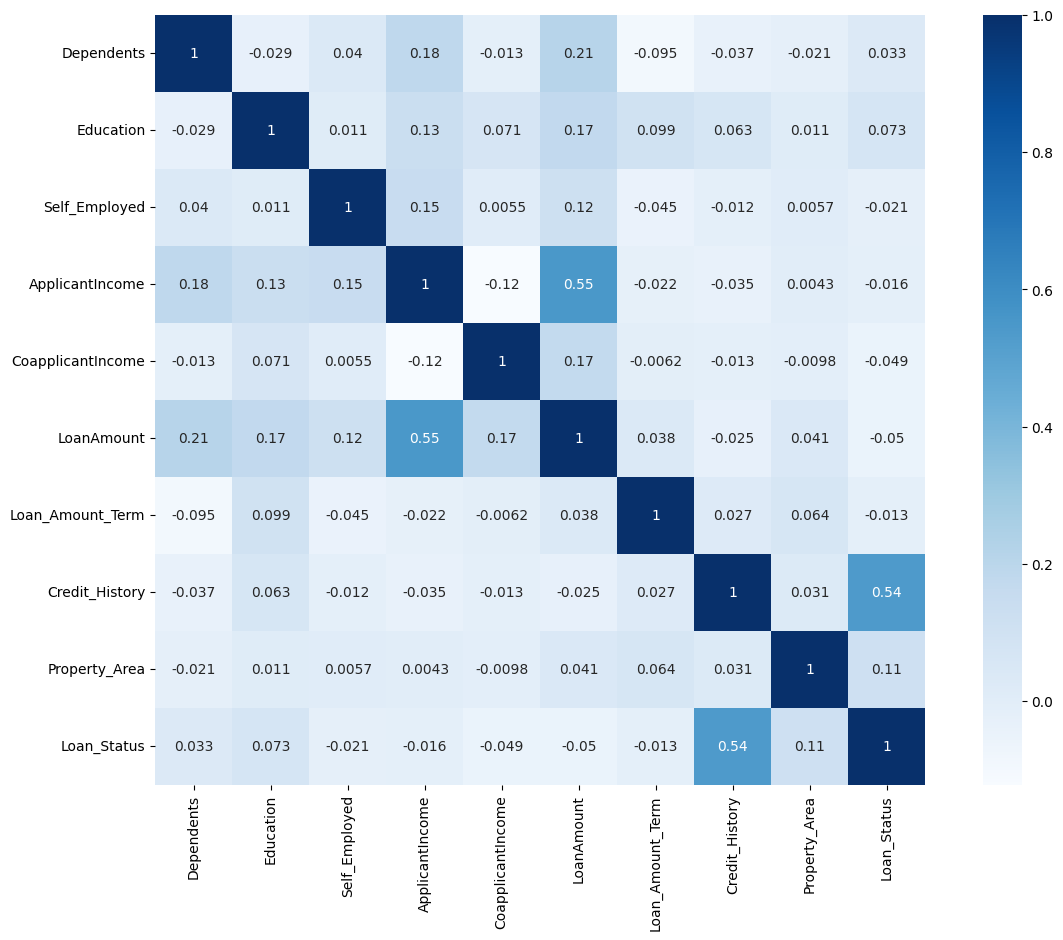

In [33]:
#find info on cmap on https://python-graph-gallery.com/92-control-color-in-seaborn-heatmaps/
plt.subplots(figsize=(15,10))
sns.heatmap(loan_dataset.corr(),cmap="Blues",annot= True ,square=True,annot_kws = {'size': 10}, cbar = True)

Where could there be correlation ?
It seems ApplicantIncome and LoanAmount are correlated to each other
It seems CreditHistory and Loan_Status are correclated to each other

<Axes: xlabel='ApplicantIncome', ylabel='LoanAmount'>

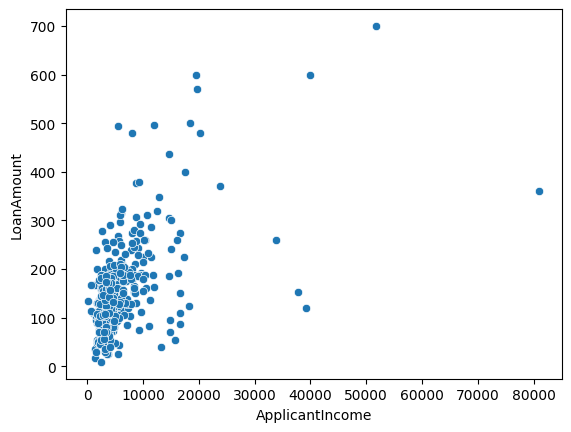

In [34]:
#scatterplot to check relationship between two variables and observe the nature of such a relationship
sns.scatterplot(x="ApplicantIncome", y="LoanAmount", data=loan_dataset)

Text(0.5, 1.0, 'Correlation between ApplicantIncome and LoanAmount')

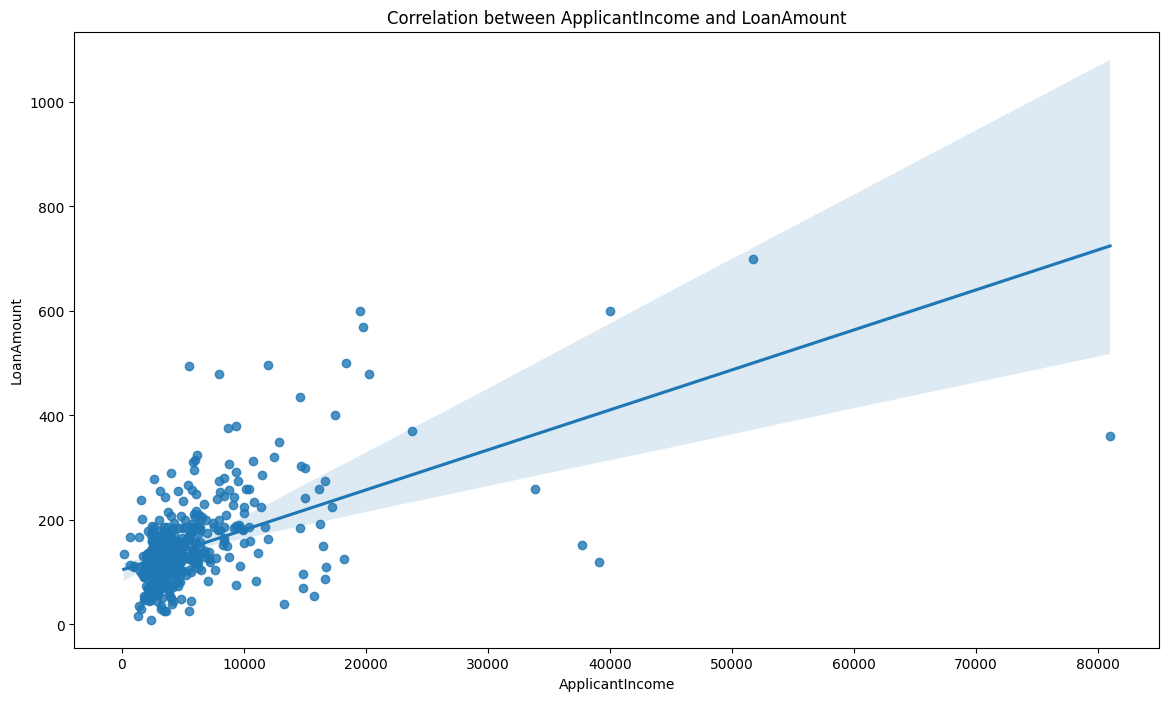

In [35]:
plt.figure(figsize=(14,8))
sns.regplot(x=loan_dataset["ApplicantIncome"], y=loan_dataset["LoanAmount"])
plt.title('Correlation between ApplicantIncome and LoanAmount')

-> the more the ApplicantIncome the bigger the LoanAmount

<Axes: xlabel='Credit_History', ylabel='Loan_Status'>

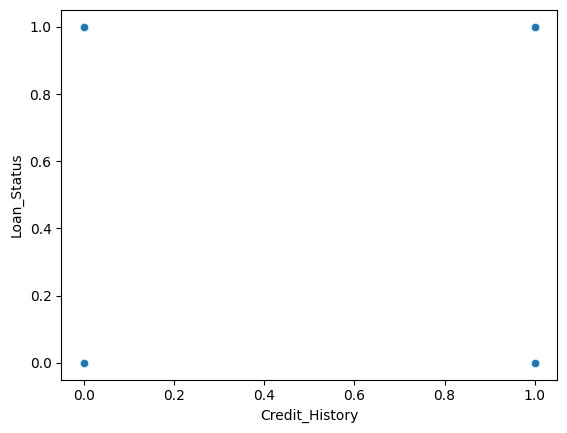

In [36]:
sns.scatterplot(x="Credit_History", y="Loan_Status", data=loan_dataset)

Text(0.5, 1.0, 'Correlation between CreditHistory and Loan_Status')

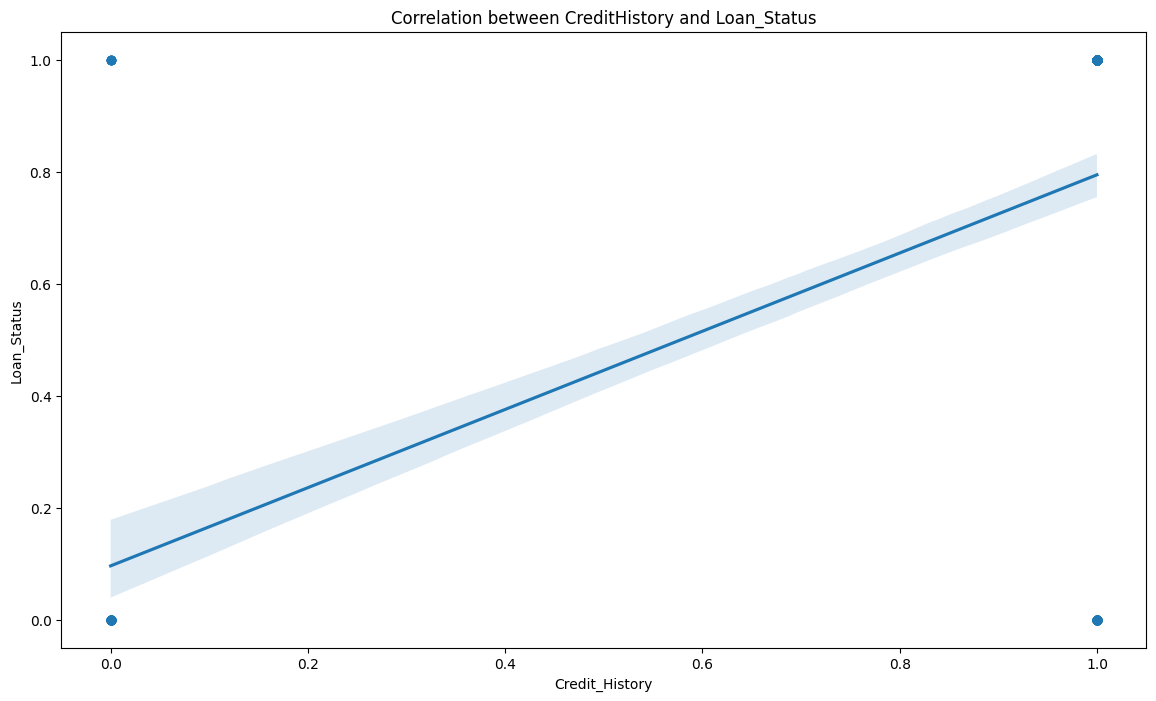

In [37]:
plt.figure(figsize=(14,8))
sns.regplot(x=loan_dataset["Credit_History"], y=loan_dataset["Loan_Status"])
plt.title('Correlation between CreditHistory and Loan_Status')

-> the higher the CreditHistory the more likely the Loan_Status = 1

#### Divide Data

AKA :
Split Data into Dependent and Independent Variable
and then :
Split Data into Training and Testing set

In [38]:
# Split data into Dependent and Independent Variables
X = loan_dataset.drop('Loan_Status',axis=1) #drop Loan_ID since it will be the Y
Y = loan_dataset['Loan_Status']

In [39]:
X.head()

,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area
1,1,1,0,4583,1508.0,128.0,360.0,1.0,1
2,0,1,1,3000,0.0,66.0,360.0,1.0,0
3,0,0,0,2583,2358.0,120.0,360.0,1.0,0
4,0,1,0,6000,0.0,141.0,360.0,1.0,0
5,2,1,1,5417,4196.0,267.0,360.0,1.0,0


In [40]:
Y.head()

1    0
2    1
3    1
4    1
5    1
Name: Loan_Status, dtype: int64

In [41]:
#Split Data into Training and Test Data
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=1)

In [42]:
X

,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area
1,1,1,0,4583,1508.0,128.0,360.0,1.0,1
2,0,1,1,3000,0.0,66.0,360.0,1.0,0
3,0,0,0,2583,2358.0,120.0,360.0,1.0,0
4,0,1,0,6000,0.0,141.0,360.0,1.0,0
5,2,1,1,5417,4196.0,267.0,360.0,1.0,0
...,...,...,...,...,...,...,...,...,...
609,0,1,0,2900,0.0,71.0,360.0,1.0,1
610,4,1,0,4106,0.0,40.0,180.0,1.0,1
611,1,1,0,8072,240.0,253.0,360.0,1.0,0
612,2,1,0,7583,0.0,187.0,360.0,1.0,0


In [43]:
X_train

,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area
71,2,0,1,1875,1875.0,97.0,360.0,1.0,2
470,1,1,1,3450,2079.0,162.0,360.0,1.0,2
97,0,1,0,1977,997.0,50.0,360.0,1.0,2
554,0,1,0,3593,4266.0,132.0,180.0,0.0,1
310,0,1,0,2917,0.0,84.0,360.0,1.0,2
...,...,...,...,...,...,...,...,...,...
319,1,1,1,10000,0.0,155.0,360.0,1.0,1
90,0,1,0,2958,2900.0,131.0,360.0,1.0,2
499,0,1,0,6283,4416.0,209.0,360.0,0.0,1
291,2,1,0,4400,0.0,127.0,360.0,0.0,2


In [44]:
X_test

,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area
443,1,1,0,37719,0.0,152.0,360.0,1.0,2
140,2,1,0,5042,2083.0,185.0,360.0,1.0,1
207,0,0,0,3975,2531.0,55.0,360.0,1.0,1
248,1,1,0,2882,1843.0,123.0,480.0,1.0,2
408,1,1,0,8300,0.0,152.0,300.0,0.0,2
...,...,...,...,...,...,...,...,...,...
406,0,0,0,2167,2400.0,115.0,360.0,1.0,0
152,0,1,0,9166,0.0,244.0,360.0,1.0,0
327,0,1,1,5818,2160.0,184.0,360.0,1.0,2
539,4,1,0,6417,0.0,157.0,180.0,1.0,1


In [45]:
Y

1      0
2      1
3      1
4      1
5      1
      ..
609    1
610    1
611    1
612    1
613    0
Name: Loan_Status, Length: 491, dtype: int64

In [46]:
Y_train

71     1
470    1
97     1
554    0
310    1
      ..
319    0
90     1
499    0
291    0
49     1
Name: Loan_Status, Length: 392, dtype: int64

In [47]:
Y_test

443    1
140    0
207    1
248    1
408    0
      ..
406    1
152    0
327    1
539    1
538    0
Name: Loan_Status, Length: 99, dtype: int64

In [48]:
print (X.shape , X_train.shape , X_test.shape)

(491, 9) (392, 9) (99, 9)


In [49]:
print (Y.shape , Y_train.shape , Y_test.shape)

(491,) (392,) (99,)


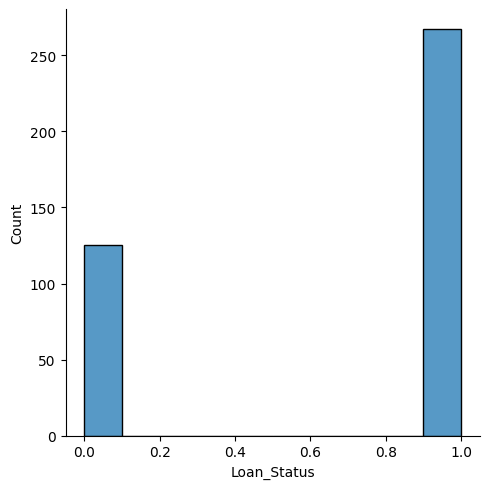

In [50]:
sns.displot(Y_train, bins=10)

Build model

Logistic Regression


In [52]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, precision_score, recall_score
from sklearn.model_selection import cross_val_score

# Fit the logistic regression model
model = LogisticRegression(random_state=16, max_iter=150)
model.fit(X_train, Y_train)

# Make predictions on the test set
Y_pred = model.predict(X_test)

# Evaluate the model
print("Accuracy:", accuracy_score(Y_test, Y_pred))
print("Precision:", precision_score(Y_test, Y_pred))
print("Recall:", recall_score(Y_test, Y_pred))

Accuracy: 0.8181818181818182
Precision: 0.8068181818181818
Recall: 0.9861111111111112


Decision Trees


In [53]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score
from sklearn.model_selection import cross_val_score

# Fit the decision tree model
model = DecisionTreeClassifier(random_state=16)
model.fit(X_train, Y_train)

# Make predictions on the test set
Y_pred = model.predict(X_test)

# Evaluate the model
print("Accuracy:", accuracy_score(Y_test, Y_pred))
print("Precision:", precision_score(Y_test, Y_pred))
print("Recall:", recall_score(Y_test, Y_pred))

Accuracy: 0.7676767676767676
Precision: 0.8656716417910447
Recall: 0.8055555555555556


Random Forests


In [54]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score
from sklearn.model_selection import cross_val_score

# Fit the random forest model
model = RandomForestClassifier(n_estimators=100, random_state=16)
model.fit(X_train, Y_train)

# Make predictions on the test set
Y_pred = model.predict(X_test)

# Evaluate the model
print("Accuracy:", accuracy_score(Y_test, Y_pred))
print("Precision:", precision_score(Y_test, Y_pred))
print("Recall:", recall_score(Y_test, Y_pred))

Accuracy: 0.7878787878787878
Precision: 0.8227848101265823
Recall: 0.9027777777777778


Support Vector Machines (SVM)


In [55]:
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, precision_score, recall_score
from sklearn.model_selection import cross_val_score

# Fit the SVM model
model = SVC(random_state=16)
model.fit(X_train, Y_train)

# Make predictions on the test set
Y_pred = model.predict(X_test)

# Evaluate the model
print("Accuracy:", accuracy_score(Y_test, Y_pred))
print("Precision:", precision_score(Y_test, Y_pred))
print("Recall:", recall_score(Y_test, Y_pred))

Accuracy: 0.7272727272727273
Precision: 0.7272727272727273
Recall: 1.0


K-Nearest Neighbors (KNN)


In [56]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score
from sklearn.model_selection import cross_val_score

# Fit the KNN model
model = KNeighborsClassifier(n_neighbors=5)
model.fit(X_train, Y_train)

# Make predictions on the test set
Y_pred = model.predict(X_test)

# Evaluate the model
print("Accuracy:", accuracy_score(Y_test, Y_pred))
print("Precision:", precision_score(Y_test, Y_pred))
print("Recall:", recall_score(Y_test, Y_pred))

Accuracy: 0.696969696969697
Precision: 0.7560975609756098
Recall: 0.8611111111111112
